# 00. PyTorch Fundamentals Exercises

### 1. Documentation reading 

A big part of deep learning (and learning to code in general) is getting familiar with the documentation of a certain framework you're using. We'll be using the PyTorch documentation a lot throughout the rest of this course. So I'd recommend spending 10-minutes reading the following (it's okay if you don't get some things for now, the focus is not yet full understanding, it's awareness):
  * The documentation on [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html#torch-tensor).
  * The documentation on [`torch.cuda`](https://pytorch.org/docs/master/notes/cuda.html#cuda-semantics).



In [1]:
# No code solution (reading)

### 2. Create a random tensor with shape `(7, 7)`.


In [2]:
# Import torch
import torch

# Create random tensor
x = torch.randn(7, 7)

print(x.shape)
print(x)

torch.Size([7, 7])
tensor([[-1.4556, -0.5879, -0.9741, -0.8317,  1.3325,  0.3696, -3.2825],
        [-1.3284,  1.8057, -1.5924, -0.3038, -1.1348,  0.3788, -1.0937],
        [ 0.3688, -1.8068, -0.5683,  0.8469,  0.9339,  0.1666,  1.9242],
        [-1.1881,  2.3910, -3.2861, -1.0704, -1.4885, -0.0132,  0.7178],
        [ 1.3061,  1.5145,  0.9736, -0.9120,  0.1198, -0.3595, -1.1653],
        [ 0.6444,  0.2361, -1.2557,  2.4125,  0.4387,  0.4112, -0.8464],
        [ 0.5153,  1.1079, -0.0955,  0.5227, -0.3557, -1.7202,  0.1798]])


### 3. Perform a matrix multiplication on the tensor from 2 with another random tensor with shape `(1, 7)` (hint: you may have to transpose the second tensor).

In [3]:
# Create another random tensor
y = torch.randn(1, 7)
# Perform matrix multiplication
print(torch.matmul(x, y.T))

tensor([[ 4.0758],
        [-0.7730],
        [-2.6389],
        [-4.2571],
        [ 1.3428],
        [-0.2543],
        [ 3.1523]])


### 4. Set the random seed to `0` and do 2 & 3 over again.

The output should be:
```
(tensor([[1.8542],
         [1.9611],
         [2.2884],
         [3.0481],
         [1.7067],
         [2.5290],
         [1.7989]]), torch.Size([7, 1]))
```

In [4]:
# Set manual seed
torch.manual_seed(0)

# Create two random tensors
x = torch.randn(7, 7)
y = torch.randn(1, 7)

# Matrix multiply tensors
result = torch.matmul(x, y.T)
print((result, result.shape))

(tensor([[ 3.5168],
        [ 2.1984],
        [-1.7815],
        [ 3.8600],
        [-1.5010],
        [-1.6916],
        [-2.9352]]), torch.Size([7, 1]))


### 5. Speaking of random seeds, we saw how to set it with `torch.manual_seed()` but is there a GPU equivalent? (hint: you'll need to look into the documentation for `torch.cuda` for this one)
  * If there is, set the GPU random seed to `1234`.

In [5]:
# Set random seed on the GPU
torch.cuda.manual_seed(1234)


### 6. Create two random tensors of shape `(2, 3)` and send them both to the GPU (you'll need access to a GPU for this). Set `torch.manual_seed(1234)` when creating the tensors (this doesn't have to be the GPU random seed). The output should be something like:

```
Device: cuda
(tensor([[0.0290, 0.4019, 0.2598],
         [0.3666, 0.0583, 0.7006]], device='cuda:0'),
 tensor([[0.0518, 0.4681, 0.6738],
         [0.3315, 0.7837, 0.5631]], device='cuda:0'))
```

In [6]:
# Set random seed
torch.cuda.manual_seed(1234)

# Check for access to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: ' + device)

# Create two random tensors on GPU
x = torch.randn(2, 3)
x = x.to(device)
y = torch.randn(2, 3)
y = y.to(device)

print((x, y))

Device: cuda


(tensor([[-0.1593, -0.1330, -0.0469],
        [-0.2802,  0.5401, -0.1464]], device='cuda:0'), tensor([[-0.1574, -1.0190,  0.0279],
        [ 0.8047, -1.3186, -1.0661]], device='cuda:0'))



### 7. Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).

The output should look like:
```
(tensor([[0.3647, 0.4709],
         [0.5184, 0.5617]], device='cuda:0'), torch.Size([2, 2]))
```

In [7]:
# Perform matmul on tensor_A and tensor_B
result = torch.matmul(x, y.T)

print((result, result.shape))

(tensor([[ 0.1592,  0.0972],
        [-0.5103, -0.7816]], device='cuda:0'), torch.Size([2, 2]))


### 8. Find the maximum and minimum values of the output of 7.

In [8]:
# Find max
print('Max:', torch.max(result))
# Find min
print('Min:', torch.min(result))

Max: tensor(0.1592, device='cuda:0')
Min: tensor(-0.7816, device='cuda:0')


### 9. Find the maximum and minimum index values of the output of 7.

In [9]:
# Find arg max
print('Arg max: ', torch.argmax(result))

# Find arg min
print('Arg min: ', torch.argmin(result))

Arg max:  tensor(0, device='cuda:0')
Arg min:  tensor(3, device='cuda:0')



### 10. Make a random tensor with shape `(1, 1, 1, 10)` and then create a new tensor with all the `1` dimensions removed to be left with a tensor of shape `(10)`. Set the seed to `7` when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

The output should look like:

```
tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]) torch.Size([10])
```

In [10]:
# Set seed
torch.cuda.manual_seed(0)

# Create random tensor
x = torch.randn(1, 1, 1, 10)
print(x)

# Remove single dimensions
x = x.reshape(10)
x = x.unsqueeze(0).unsqueeze(0).unsqueeze(0)
x = x.squeeze()

# Print out tensors and their shapes
print((x, x.shape))

tensor([[[[-2.9771,  1.9956, -0.9683, -0.7803, -0.5713, -0.9645, -1.0204,
            1.0309,  2.2084,  0.1380]]]])
(tensor([-2.9771,  1.9956, -0.9683, -0.7803, -0.5713, -0.9645, -1.0204,  1.0309,
         2.2084,  0.1380]), torch.Size([10]))


In [11]:
x = torch.empty(3, 4)
print(type(x), x)

<class 'torch.Tensor'> tensor([[2.2251e-31, 0.0000e+00, 5.8625e-30, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 9.1835e-41, 0.0000e+00]])


- `torch.Tensor` is an alias for `torch.FloatTensor` by default which 32 bit floating point number.
- `torch.empty` allocates memory for the tensor, but doesnot initialize it with any values, so the output is garbage values already present in the allocated memory.
- 1-dimensional tensor is called a vector.
- 2-dimensional tensor is often referred to as a matrix.
- Anything more than 2 dimensions is called a vector.

In [12]:
zeros = torch.zeros(2, 3)
print('Zeros: ', (zeros, zeros.shape))

ones = torch.ones(2, 3)
print('Ones: ', (ones, ones.shape))

Zeros:  (tensor([[0., 0., 0.],
        [0., 0., 0.]]), torch.Size([2, 3]))
Ones:  (tensor([[1., 1., 1.],
        [1., 1., 1.]]), torch.Size([2, 3]))


In [13]:
torch.manual_seed(1729)
uniform_distribution = torch.rand(2, 3)
print('Uniform random:', uniform_distribution)

gaussian = torch.randn(2, 3)
print('Standard Normal (Gaussian):', gaussian)

Uniform random: tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
Standard Normal (Gaussian): tensor([[ 1.0757, -1.2086, -0.6922],
        [ 2.0419, -1.8508,  2.1626]])


- `torch.rand` samples from uniform distribution with range [0, 1]
- `torch.randn` samples from standard normal distribution with mean = 0 and std_deviation = 1
- `torch.random_seed` make the random values reproducible. [pytorch documentation on reproducibility](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)

In [14]:
x = torch.empty(2, 2, 3)
print((x, x.shape))

empty_like_x = torch.empty_like(x)
print('Empty Like:', (empty_like_x, empty_like_x.shape))

zeros_like_x = torch.zeros_like(x)
print('Zeros like:', (zeros_like_x, zeros_like_x.shape))

ones_like_x = torch.ones_like(x)
print('Ones like:', (ones_like_x, ones_like_x.shape))

rand_like = torch.rand_like(x)
print('Rand like:', (rand_like, rand_like.shape))

randn_like = torch.randn_like(x)
print('Randn like:', (randn_like, randn_like.shape))

(tensor([[[2.4317e-34, 4.5765e-41, 5.8602e-30],
         [0.0000e+00, 1.4013e-45, 0.0000e+00]],

        [[5.8734e-30, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]]), torch.Size([2, 2, 3]))
Empty Like: (tensor([[[5.8592e-30, 0.0000e+00, 5.8664e-30],
         [0.0000e+00, 1.1210e-43, 0.0000e+00]],

        [[8.9683e-44, 0.0000e+00, 2.2269e-31],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]]), torch.Size([2, 2, 3]))
Zeros like: (tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]]), torch.Size([2, 2, 3]))
Ones like: (tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]]), torch.Size([2, 2, 3]))
Rand like: (tensor([[[0.6929, 0.1703, 0.1384],
         [0.4759, 0.7481, 0.0361]],

        [[0.5062, 0.8469, 0.2588],
         [0.2707, 0.4115, 0.6839]]]), torch.Size([2, 2, 3]))
Randn like: (tensor([[[-1.1860, -0.4872, -1.9286],
         [-1.1155,  2.2702,  0.1513]],

        [[-0.6572,

- *_like methods create a new tensor with the same shape as the input tensor

In [15]:
some_constants = torch.Tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.Tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.Tensor(((2, 4, 6), [3, 6, 8]))
print(more_integers)

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2.,  3.,  5.,  7., 11., 13., 17., 19.])
tensor([[2., 4., 6.],
        [3., 6., 8.]])


- `torch.Tensor` creates a tensor from list or tuple.

In [16]:
a = torch.ones(2, 3, dtype=torch.int16)
a = torch.ones((2, 3), dtype=torch.int16)
# both are correct, second preferred.
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)
print(c)

# Available data types
# torch.bool
# torch.int8
# torch.uint8
# torch.int16
# torch.int32
# torch.int64
# torch.half euivalent to torch.float16
# torch.float
# torch.double
# torch.bfloat

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[17.7174, 14.2091, 18.9694],
        [15.5129,  1.7932, 13.2545]], dtype=torch.float64)
tensor([[17, 14, 18],
        [15,  1, 13]], dtype=torch.int32)


In [17]:
# Mathematical operations
ones = torch.zeros(2, 3) + 1
twos = torch.ones(2, 3) * 2
threes = (torch.ones(2, 3) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print((ones, ones.shape))
print((twos, twos.shape))
print((threes, threes.shape))
print((fours, fours.shape))
print(sqrt2s, sqrt2s.shape)

(tensor([[1., 1., 1.],
        [1., 1., 1.]]), torch.Size([2, 3]))
(tensor([[2., 2., 2.],
        [2., 2., 2.]]), torch.Size([2, 3]))
(tensor([[3., 3., 3.],
        [3., 3., 3.]]), torch.Size([2, 3]))
(tensor([[4., 4., 4.],
        [4., 4., 4.]]), torch.Size([2, 3]))
tensor([[1.4142, 1.4142, 1.4142],
        [1.4142, 1.4142, 1.4142]]) torch.Size([2, 3])


- Arithmetic operations between tensors and scalars are distributed over every element of the tensor.

In [18]:
twos = torch.ones((2, 2)) * 2
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2, powers2.shape)

fives = ones + fours
print(fives)

dozens = threes * fours # This mutliplies corresponding elements of two tensors.
# It is different from matrix multiplication.
print(dozens)

result = torch.matmul(threes.T, fours)
print('MatMul:', result)

tensor([[ 2.,  4.],
        [ 8., 16.]]) torch.Size([2, 2])
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[12., 12., 12.],
        [12., 12., 12.]])
MatMul: tensor([[24., 24., 24.],
        [24., 24., 24.],
        [24., 24., 24.]])


In [19]:
a = torch.rand(2, 3)
b = torch.rand(3, 2)

# print(a * b) # Shape should be same for scalar multiplication.

In [20]:
z = torch.ones(3, 4)
print(z)

x = z * torch.tensor([[1], [2], [3]])
doubled = x * (torch.ones(1, 4) * 2)

print(x)
print(doubled)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])
tensor([[2., 2., 2., 2.],
        [4., 4., 4., 4.],
        [6., 6., 6., 6.]])


Broadcasting is a way to perform an operation between tensors that have similarities in their shapes. In the example above, the one-row, four-column tensor is mutliplied by both rows of the two-row, four-column tensor.

The rules of broadcasting are:
- Each tensor must have at least one dimension - no empty tensors.
- Comparing the dimension sizes of the two tensors, going from last to first:
  - Each dimension must be equal, or
  - One of the dimensions msut be of size 1, or
  - The dimension does not exist in one of the tensor.

In [21]:
a = torch.ones(4, 3, 2)

b = a * torch.rand(3, 2)
print(b)

c = a * torch.rand(3, 1)
print(c)

d = a * torch.rand(1, 2)

tensor([[[0.7242, 0.0776],
         [0.4004, 0.9877],
         [0.0352, 0.0905]],

        [[0.7242, 0.0776],
         [0.4004, 0.9877],
         [0.0352, 0.0905]],

        [[0.7242, 0.0776],
         [0.4004, 0.9877],
         [0.0352, 0.0905]],

        [[0.7242, 0.0776],
         [0.4004, 0.9877],
         [0.0352, 0.0905]]])
tensor([[[0.4485, 0.4485],
         [0.8740, 0.8740],
         [0.2526, 0.2526]],

        [[0.4485, 0.4485],
         [0.8740, 0.8740],
         [0.2526, 0.2526]],

        [[0.4485, 0.4485],
         [0.8740, 0.8740],
         [0.2526, 0.2526]],

        [[0.4485, 0.4485],
         [0.8740, 0.8740],
         [0.2526, 0.2526]]])


In [22]:
# Maths with tensors

a = torch.rand(2, 4) * 2 - 1
print(a)
print('Common functions:')
print('Absolute:', torch.abs(a))
print('Ceil:', torch.ceil(a))
print('Floor:', torch.floor(a))
print('Clamp:', torch.clamp(a, -0.5, 0.5))

tensor([[ 0.5491, -0.5340,  0.6881,  0.8008],
        [-0.2010,  0.2648,  0.8928, -0.9773]])
Common functions:
Absolute: tensor([[0.5491, 0.5340, 0.6881, 0.8008],
        [0.2010, 0.2648, 0.8928, 0.9773]])
Ceil: tensor([[1., -0., 1., 1.],
        [-0., 1., 1., -0.]])
Floor: tensor([[ 0., -1.,  0.,  0.],
        [-1.,  0.,  0., -1.]])
Clamp: tensor([[ 0.5000, -0.5000,  0.5000,  0.5000],
        [-0.2010,  0.2648,  0.5000, -0.5000]])


In [23]:
import math
# Trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4, math.pi])

sines = torch.sin(angles)
print(sines)
inverses = torch.asin(sines)
print(inverses)

tensor([ 0.0000e+00,  7.0711e-01,  1.0000e+00,  7.0711e-01, -8.7423e-08])
tensor([ 0.0000e+00,  7.8540e-01,  1.5708e+00,  7.8540e-01, -8.7423e-08])


In [24]:
# bitwise operations
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

tensor([3, 2, 1])


In [25]:
# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)
print(torch.eq(d, e))


Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])


In [26]:
# Reductions
print('Reduction ops')
print(torch.max(d)) # maximum tensor
print(torch.max(d).item()) # maximum value
print(torch.mean(d)) # mean tensor
print(torch.std(d)) # standard deviation
print(torch.prod(d)) # product
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements.

Reduction ops
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])


In [27]:
# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.]) # x unit vector
v2 = torch.tensor([0., 1., 9.]) # y unit vector
m1 = torch.rand(2, 2) # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('Vectors & Matrices:')
print(torch.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)
print(torch.svd(m3))

Vectors & Matrices:
tensor([ 0.,  9., -1.])
tensor([[0.5183, 0.9807],
        [0.6545, 0.4144]])
tensor([[1.5548, 2.9421],
        [1.9635, 1.2431]])
torch.return_types.svd(
U=tensor([[-0.8335, -0.5526],
        [-0.5526,  0.8335]]),
S=tensor([3.9398, 0.9757]),
V=tensor([[-0.6043,  0.7968],
        [-0.7968, -0.6043]]))


- Most of the math functions have a version with an appended underscore (`_`) that will alter a tensor in place

In [28]:
a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print(torch.sin(a))
print(a)

print(torch.sin_(a)) # in place operation
print(a)

tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7071, 1.0000, 0.7071])


In [29]:
a = torch.ones(2, 2)
b = a

a[0][1] = 561 # we change a...
print(b)

tensor([[  1., 561.],
        [  1.,   1.]])


In [30]:
print(id(a))
print(id(b))

140265499624688
140265499624688


In [31]:
a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # different objects in memory...
print(torch.eq(a, b))  # ...but still with the same contents!

a[0][1] = 561          # a changes...
print(b)               # ...but b is still all ones

tensor([[True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.]])


In [32]:
# If the source tensor has autograd, enabled then so will the clone.
# The detach method detaches the tensor from its computation history.
# It says do whatever comes next as if autograd was off.

a = torch.rand(2, 2, requires_grad = True) # turn on autograd
print(a)

b = a.clone()
print(b)

c = a.detach().clone()
print(c)

print(a)

tensor([[0.0696, 0.4648],
        [0.4491, 0.6265]], requires_grad=True)
tensor([[0.0696, 0.4648],
        [0.4491, 0.6265]], grad_fn=<CloneBackward0>)
tensor([[0.0696, 0.4648],
        [0.4491, 0.6265]])
tensor([[0.0696, 0.4648],
        [0.4491, 0.6265]], requires_grad=True)


In [33]:
# CUDA - Compute Unified Device Architecture
if torch.cuda.is_available():
  print('We have a gpu available')
else:
  print('Sorry, CPU only')


We have a gpu available


In [34]:
# By default, new tensors are created on the CPU, so we have to specify
# when we want to create our tensor on the GPU with the optional
# device argument.

gpu_rand = torch.rand(2, 2, device = 'cuda')

print(gpu_rand)

tensor([[0.3344, 0.2640],
        [0.2119, 0.0582]], device='cuda:0')


In [35]:
# Number of gpus
print(torch.cuda.device_count())

1


In [36]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

print('Device: {}'.format(device))

x = torch.rand(2, 2, device = device)
print(x)

Device: cuda:0
tensor([[0.0024, 0.6778],
        [0.2441, 0.6812]], device='cuda:0')


In [37]:
y = torch.rand(2, 2)
print(y)
y = y.to(device)
print(y)

# All tensors must be on the same device for computation.

tensor([[0.9411, 0.4922],
        [0.5461, 0.5396]])
tensor([[0.9411, 0.4922],
        [0.5461, 0.5396]], device='cuda:0')


In [38]:
import numpy as np

numpy_array = np.ones((2, 3))
print(numpy_array)

[[1. 1. 1.]
 [1. 1. 1.]]


In [39]:
pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [40]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.3053, 0.1973, 0.3285],
        [0.5655, 0.0065, 0.7765]])
[[0.30533576 0.19729328 0.32854253]
 [0.5655247  0.00654191 0.7765235 ]]


In [41]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

a = torch.linspace(0., 2. * math.pi, steps = 25, requires_grad = True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


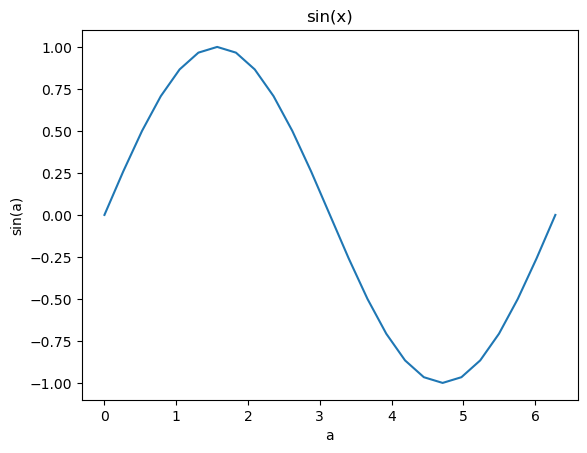

In [42]:
b = torch.sin(a)
plt.xlabel("a")
plt.ylabel("sin(a)")
plt.title("sin(x)")
plt.plot(a.detach(), b.detach())

In [43]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [44]:
c = 2 * b
print(c)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)


In [45]:
d = c + 1
print(d)

tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [46]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [47]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7f91ebd4deb0>, 0), (None, 0))
((<SinBackward0 object at 0x7f91ebd4d490>, 0), (None, 0))
((<AccumulateGrad object at 0x7f91ebd4dfa0>, 0),)
()

c:

b:

a:
None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


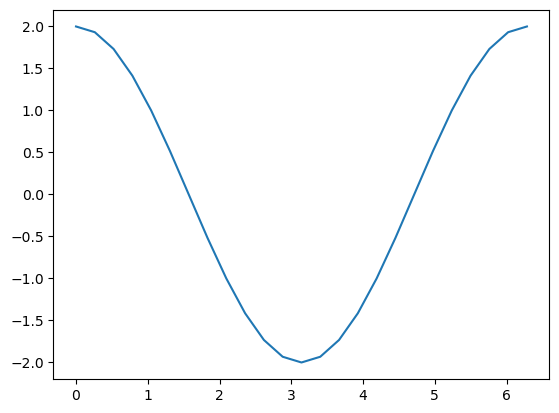

In [48]:
out.backward()
print(a.grad)

plt.plot(a.detach(), a.grad.detach())

In [49]:
# Only the leaf nodes of the computation graph have their gradient computed.

In [50]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

  def __init__(self):
    super(TinyModel, self).__init__()

    self.layer1 = torch.nn.Linear(1000, 100)
    self.relu = torch.nn.ReLU()
    self.layer2 = torch.nn.Linear(100, 10)

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    x = self.layer2(x)
    return x


some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad = False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad = False)

model = TinyModel()

In [51]:
# In suclass of nn.Module, it is assumed we want to compute gradients.
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad)

tensor([ 0.0923, -0.0489,  0.0261, -0.0763, -0.0773,  0.0064, -0.0458,  0.0910,
         0.0139,  0.0356], grad_fn=<SliceBackward0>)
None


In [52]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

prediction = model(some_input)
loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(146.2116, grad_fn=<SumBackward0>)


In [53]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0923, -0.0489,  0.0261, -0.0763, -0.0773,  0.0064, -0.0458,  0.0910,
         0.0139,  0.0356], grad_fn=<SliceBackward0>)
tensor([-0.0171,  0.4951,  0.3446, -4.3807, -1.1512, -0.6447,  0.8253, -1.2583,
        -3.1971, -2.2746])


In [54]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0923, -0.0494,  0.0258, -0.0719, -0.0761,  0.0070, -0.0467,  0.0923,
         0.0171,  0.0378], grad_fn=<SliceBackward0>)
tensor([-0.0171,  0.4951,  0.3446, -4.3807, -1.1512, -0.6447,  0.8253, -1.2583,
        -3.1971, -2.2746])


In [55]:
# optimizer.zero_grad() is required to stop gradient from accumulating.
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
  prediction = model(some_input)
  loss = (ideal_output - prediction).pow(2).sum()
  loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none = False)

print(model.layer2.weight.grad[0][0:10])

tensor([-0.0171,  0.4951,  0.3446, -4.3807, -1.1512, -0.6447,  0.8253, -1.2583,
        -3.1971, -2.2746])
tensor([ -9.2761,  10.4892,   2.9984,  -5.6924,  -1.5252,   2.8243,   8.5725,
        -13.2700,   5.7830, -13.4617])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [56]:
def add_tensors1(x, y):
  return x + y

@torch.no_grad()
def add_tensors2(x, y):
  return x + y # Not part of computation graph and gradient computation.


x = torch.rand(5, requires_grad = True) # Requires gradient tracking
y = x.detach() # y doesnot require gradient tracking

print(x)
print(y)

tensor([0.6580, 0.1519, 0.1373, 0.6356, 0.6052], requires_grad=True)
tensor([0.6580, 0.1519, 0.1373, 0.6356, 0.6052])


In [57]:
class SmallModel(torch.nn.Module):

  def __init__(self):
    super(SmallModel, self).__init__()

    self.linear1 = torch.nn.Linear(100, 200)
    self.activation = torch.nn.ReLU()
    self.linear2 = torch.nn.Linear(200, 10)
    self.softmax = torch.nn.Softmax()

  def forward(self, x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.softmax(x)

    return x

small = SmallModel()

print('The model:')
print(small)

print('\n\nJust one layer:')
print(small.linear2)

print('\n\nModel params:')
for param in small.parameters():
  print(param.shape)

The model:
SmallModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


Just one layer:
Linear(in_features=200, out_features=10, bias=True)


Model params:
torch.Size([200, 100])
torch.Size([200])
torch.Size([10, 200])
torch.Size([10])


In [58]:
from torch.utils.tensorboard import SummaryWriter
# Image datasets and image manipulation
import torchvision
import torchvision.transforms as transforms

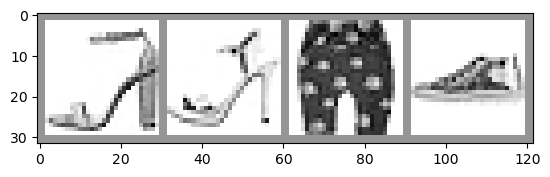

In [59]:
# Gather datasets and prepare them for consumption
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])

# Store seperate training and validation splits in ./data
training_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
validation_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=4,
                                              shuffle=True,
                                              num_workers=2)


validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=4,
                                                shuffle=False,
                                                num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Extract a batch of 4 images
dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)


In [60]:
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

writer.add_image('Four Fashion-MNIST Images', img_grid)
writer.flush()

In [61]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [62]:
print(len(validation_loader))
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0

    for i, data in enumerate(training_loader, 0):
        # basic training loop
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:    # Every 1000 mini-batches...
            print('Batch {}'.format(i + 1))
            # Check against the validation set
            running_vloss = 0.0

            # In evaluation mode some model specific operations can be omitted eg. dropout layer
            net.train(False) # Switching to evaluation mode, eg. turning off regularisation
            for j, vdata in enumerate(validation_loader, 0):
                vinputs, vlabels = vdata
                voutputs = net(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()
            net.train(True) # Switching back to training mode, eg. turning on regularisation

            avg_loss = running_loss / 1000
            avg_vloss = running_vloss / len(validation_loader)

            # Log the running loss averaged per batch
            writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : avg_loss, 'Validation' : avg_vloss },
                            epoch * len(training_loader) + i)

            running_loss = 0.0
print('Finished Training')

writer.flush()

2500
Batch 1000
Batch 2000
Batch 3000
Batch 4000
Batch 5000
Batch 6000
Batch 7000
Batch 8000
Batch 9000
Batch 10000
Batch 11000
Batch 12000
Batch 13000
Batch 14000
Batch 15000
Finished Training


In [63]:
dataiter = iter(training_loader)
images, labels = next(dataiter)

writer.add_graph(net, images)
writer.flush()

In [64]:
# Select a random subset of data and corresponding labels
def select_n_random(data, labels, n=100):
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# Extract a random subset of data
images, labels = select_n_random(training_set.data, training_set.targets)

# get the class labels for each image
class_labels = [classes[label] for label in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.flush()
writer.close()

In [65]:
# Remember that you must call model.eval() to set dropout and batch normalization layers to evaluation mode
# efore running inference. Failing to do this will yield inconsistent inference results.
# If you wish to resuming training, call model.train() to ensure these layers are in training mode.